## Юнит 5. Основные алгоритмы машинного обучения. Часть I 
### Skillfactory: DSPR-19
### ML-3B. Классификация 

**Классификация** — самая популярная задача в машинном обучении. Алгоритм в ней сортирует объекты по нескольким классам. Можно сравнить его с ребенком, который раскладывает игрушки по коробкам — собачек в одну, а кошечек в другую.

У нас есть некоторое количество объектов, каждый из которых принадлежит определенной группе (**классу**). На обучающей выборке нам известны эти соотношения (известно, какой объект какому классу принадлежит). Нам требуется построить алгоритм на обучающей выборке, который сможет в будущем определять классы для новых объектов.

**Какие задачи можно решать с помощью классификации?**

На данный момент классификация используется в следующих сферах:

- Спам-фильтры и прочие фильтры почтовых ящиков: скорее всего, ваш почтовый клиент умеет не только отделять спам, но и сортировать письма от социальных сетей и промоакции.
- Определение языка: с этим мы сталкиваемся постоянно, когда браузер предлагает нам перевести страницу или когда мы используем онлайн-переводчик, не зная языка оригинала.
- Анализ тональности: к примеру, алгоритм может распознать, отрицательный или положительный отзыв написал вам клиент.
- Распознавание рукописных букв и цифр: на данный момент уже существуют программы, переводящие рукописный текст в печатный. Это возможно именно благодаря классификации.

Рассмотрим чуть подробнее несколько крупных и часто встречающихся задач, которые можно решить с помощью алгоритмов классификации.

#### Задача кредитного скоринга


На основе данных предыдущих кредиторов банк решает, выдавать ли кредит клиенту.

В такой задаче у нас всего два класса: **надежный заемщик** или **ненадежный**.

Признаки обычно бывают всех типов:

- бинарные (пол, наличие квартиры под залог, семейное положение);
- номинальные (место проживания,профессия);
- ординальные (образование, должность);
- количественные (доход, возраст).

Задача довольно классическая, редко требует долгой предобработки (в силу того, что для кредита нужно обязательно заполнять все поля, пропусков тоже не допускается).



#### Задача биометрической идентификации личности

Для биометрической идентификации личности используют обычно снимок радужки глаза и/или отпечаток пальца.  Это изображения, поэтому к решению задачи требуется достаточно объемная подготовка данных. Кроме того, тут предельно важна максимально возможная точность.

#### Задача категоризации текстовых документов

Одна из нетривиальных задач — распределение документов по рубрикам.

Здесь встречаются следующие признаки:

- номинальные (автор, издание, год);
- количественные (встречаемость слов и специфических терминов).

Главная проблема такой задачи в том, что каждый документ может попасть в две рубрики. Кроме того, данные могут иметь большое количество пропусков.

Подводя итог, можно сказать, что классификация используется там, где мы делим объекты на какие-то группы. Количество групп не имеет значения, однако оно должно быть конечным.

### 3B.2. Метрики качества классификации


После того, как мы обучили классификатор, необходимо **оценить его качество**. Для этого у нас есть несколько метрик.

Самая простая и понятная метрика — *Accuracy*. По сути, это просто доля объектов, которые алгоритм отнес к верному классу.

Введем следующие обозначения.

Тот класс, который мы диагностируем, назовем **позитивным**, а другой класс — **негативным**. 

Например, если мы хотим обучить алгоритм распознавать больных людей, то больные будут попадать в позитивный класс, а здоровые — в негативный.

Тогда верно определенных больных мы обозначим за **TP** *(true positive)*, ошибочно определенных больных — за **FP** *(false positive)*, верно определенных здоровых — за **TN** *(true negative)*, ошибочно определенных здоровых — за **FN** *(false negative)*.

То есть:

**TP** — истинно-положительные решения;  
**TN** — истинно-отрицательные решения;  
**FP** — ложно-положительные решения;  
**FN** — ложно-отрицательные решения.

### Accuracy = (TP+TN) / (TP+FP+FN+TN)

**Важно!**  
Важно отметить, что у этой метрики есть довольно существенный недостаток. Она присваивает всем объектам одинаковый вес. Поэтому в случае несбалансированности классов она может давать нерелевантный результат.

То есть, к примеру, классификатор может иметь *Accuracy* в районе 0,8 и при этом вообще не распознавать объекты из какого-то класса, если их очень мало. Поэтому обязательно необходимо проверять сбалансированность классов перед применением этой метрики.

**Точность и полнота**  
Следующие важные метрики — _Precision_ (точность) и _Recall_ (полнота). Они вычисляются следующим образом:

### Precision = TP / (TP + FP)  
### Recall = TP / (TP + FN)  

**Точность классификации** — это доля объектов, действительно принадлежащих данному классу относительно всех объектов, которые алгоритм отнес к этому классу.

**Полнота** — это доля найденных классификатором объектов, принадлежащих классу относительно всех объектов, которые принадлежат этому классу.

**F-мера**
Чтобы найти оптимальное соотношение этих показателей, существует метрика, которая объединяет в себе сразу и точность, и полноту F — мера. F-мера является средним гармоническим между точностью и полнотой и вычисляется по следующей формуле:

### F - мера = (2 * Precision * Recall) / (Precision + Recall)

### Реализация в Python
Для начала подгружаем библиотеки:



In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

Воспользуемся встроенным датасетом, который содержит информацию об опухолях груди:



In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

Теперь зададим зависимую и независимые переменные:



In [3]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:



In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Готово! Теперь осталось только вычислить необходимые метрики:



In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

0.9590643274853801
0.9351851851851852
1.0
0.9665071770334929


### Задание 3B.2.1
Вы создали классификатор, который разделяет экономические и политические новости на два разных Telegram-канала, и хотите проверить его качество. За день вышло 15 политических новостей и 20 экономических.
Ваш алгоритм из 15 политических новостей отметил 9 как экономические, а из 20 экономических — 6 как политические.
Найдите метрику _Accuracy_.
Ответ округлите до сотых.

<img src="pictures/solution3B_2_1.png" width="600"/>

In [10]:
TP = 14
FP = 6
FN = 9
TN = 6
acc = (TP+TN)/(TP+FP+FN+TN)

print(f"Accuracy = {round(acc,2)}")

Accuracy = 0.57


### Задание 3B2.2
Загрузите встроенный в библиотеку sklearn датасет про ирисы с помощью функции load_iris. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики Accuracy.
Ответ округлите до сотых. 

In [26]:
from sklearn.datasets import  load_iris # подгружаем датасет
iris =  load_iris()

In [35]:
# выведем описание датасета
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [33]:
import numpy as np
np.random.seed(50)
# зададим зависимую и независимые переменные:
Y = iris.target ## Наша целевая переменная, три класса - 0 - Setosa, 1 - Versicolor,  2 - Virginica
X = iris.data # X - признаки, по которым мы будем предсказывать класс ириса

# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

# предсказываем целевые значения на тестовой выборке и выводим accuracy
Y_predicted = model.predict(X_val)
accuracy = accuracy_score(Y_val,Y_predicted)

print(f"Accuracy = {round(accuracy,2)}")

Accuracy = 0.98


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3B.3. Классификация. Практика


У вас есть датасет с параметрами мобильных телефонов. Переменная price_range отвечает за то, к какой категории относится телефон: 1 — дорогие, 0 — дешевые.  
Ваша задача состоит в том, чтобы наиболее точно научиться классифицировать телефоны по этим двум категориям на основании других параметров.  

*Шаг 1*  
Для начала нам надо отобрать признаки, с помощью которых мы будем предсказывать категорию телефона.  
### Задание 3B.3.1 Отбор признаков  
Выберите пять признаков, у которых наибольшая взаимосвязь с целевой переменной (с помощью корреляции). Отметьте отобранные признаки:

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# подгрузим файл и посмотрим на его первые строки:
df = pd.read_csv('train_mobile.csv', sep =';')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

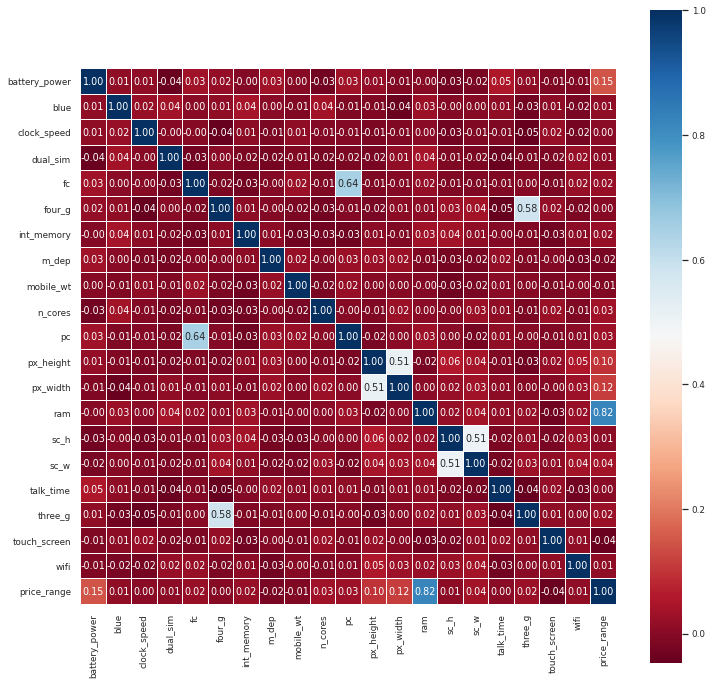

In [39]:
# Теперь займемся отбором признаков.  Для начала нам надо проверить, нет ли мультиколлинеарности — сильной взаимосвязи между независимыми признаками. Для этого построим матрицу корреляций для признаков: 
sns.set(font_scale=0.8)
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

In [40]:
corr_df = abs(df.corr()['price_range'])
corr_df.sort_values(ascending=False)[0:6]

price_range      1.000000
ram              0.822354
battery_power    0.149402
px_width         0.116703
px_height        0.097951
touch_screen     0.040001
Name: price_range, dtype: float64

In [41]:
from itertools import zip_longest

temp = list(corr_df.sort_values(ascending=False)[0:6].index)

print(f"Пять признаков, у которых наибольшая взаимосвязь с целевой переменной:")
print(*[str(i)+'. '+str(g) for i,g in zip_longest(range(len(temp)),temp) if i != 0], sep='\n')

Пять признаков, у которых наибольшая взаимосвязь с целевой переменной:
1. ram
2. battery_power
3. px_width
4. px_height
5. touch_screen


*ШАГ 2*  
Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.  

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории.  

### Задание 3B.3.2 Выбор метрики
Что это за метрика?  
***Ответ:*** - precision

<img src="pictures/solution3B_3_2.png" width="600"/>

### 3B.3.3 Значение метрики
Введите полученное значение,  
***округлите до четырех знаков после запятой.***

In [44]:
np.random.seed(31)

# зададим зависимую и независимые переменные:
X = df.loc[:, ['ram','battery_power', 'px_width', 'px_height', 'touch_screen']] 
Y = df['price_range']

# Разбиваем выборку на обучающую и тестовую и обучаем нашу модель:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)
model = LogisticRegression()
model.fit(X_train, Y_train)

# предсказываем целевые значения на тестовой выборке и выводим accuracy
Y_predicted = model.predict(X_val)
precision = precision_score(Y_val,Y_predicted)

print(f"precision = {round(precision,4)}")

precision = 0.9859


### 3B.4. Логистическая регрессия. Часть 1

Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса. Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.

### Задание 3B.4.1
Зачем вводится понятие margin?  
Ответ:  
- Чтобы свести классификацию к регрессии
- Чтобы сделать функцию потерь непрерывной
- Чтобы точнее оценивать качество модели

### Задание 3B.4.2
Какие из этих выборок линейно разделимы?  
Ответ:
- Правая линейно разделимая

### Задание 3B.4.3 
Почему линейная регрессия плохо подходит для предсказания вероятности?  
Ответ:
- Линейная регрессия может предсказать значения меньше 0 или больше 1

### 3B.5. Логистическая регрессия. Часть 2
Softmax — обобщение сигмоиды для многомерного случая. Функция преобразует вектор z размерности в вектор той же размерности, где каждая координата полученного вектора представлена вещественным числом в интервале [0,1] и сумма координат равна 1.

### Задание 3B.5.1
У какой из этих логистических функций больше коэффициент k, а у какой — P?  
***Ответ:*** - У первой функции значение k и P больше, чем у второй (2>-3, 2>1). см. график ниже

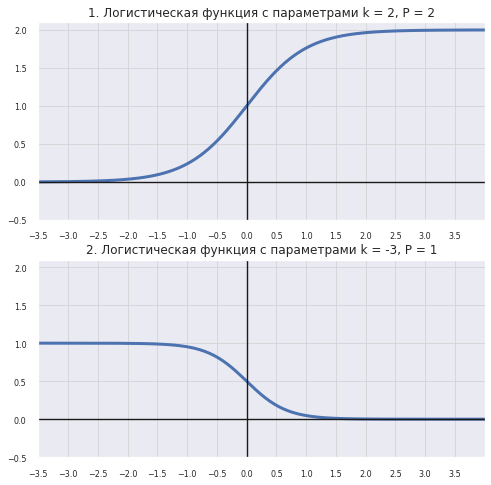

In [45]:
def logistic_f(k, P, z):
    return P / (1 + np.exp(-k * z))

a,b = -3.5, 4
y1,y2 = -.5, 2.1
k0,k1 = 2, -3
P0,P1 = 2, 1

plt.style.use('seaborn-paper')
x = np.linspace(a, b, 200)
fig,ax =  plt.subplots(2,1, figsize=(8, 8))
ax[0].plot(x, logistic_f(k0, P0, x), lw=3)
ax[1].plot(x, logistic_f(k1, P1, x), lw=3)
ax[0].set_title(f'1. Логистическая функция с параметрами k = {k0}, P = {P0}', size=12)
ax[1].set_title(f'2. Логистическая функция с параметрами k = {k1}, P = {P1}', size=12)
for i in [0,1]:
    ax[i].axhline(y=0, color = 'k')
    ax[i].axvline(x=0, color = 'k')
    ax[i].set_xlim(a, b)
    ax[i].set_ylim(y1,y2)
    ax[i].set_xticks(np.arange(a, b, 0.5))
    ax[i].set_yticks(np.arange(y1,y2, 0.5))
    ax[i].grid(which='major', color = 'lightgray')

plt.show()

### Задание 3B.5.2
Почему _logloss_ больше подходит для оценки качества логистической регрессии, чем _Accuracy_ ?  
Ответ:
- logloss  учитывает уверенность классификатора в ответе 

### Задание 3B.5.3
Посчитайте *logloss* для данных в таблице (без нормализации). ***Укажите число с точностью до сотых:***

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  # подгружаем метрики

In [47]:
y_pred = [0.2, 0.8, 1, 0.6]
y = [0,0,1,1]

log_loss_f = metrics.log_loss
temp = log_loss_f(y, y_pred, normalize=False)

print(f"log_loss = {round(temp,2)}")

log_loss = 2.34


### Задание 3B.5.4
Посчитайте _logloss_ для данных в таблице. Необходимо найти среднюю ошибку. Классификация на три класса:

In [48]:
# для тех кто любит харкор можно использовать самописную функцию
def multi_logloss(y_true, y_pred):
    n, m = y_true.shape[0], y_true.shape[1]
    sum_ = []
    for i in range(n):
        for j in range(m):
            if y_true[i][j] != 0 and y_pred[i][j] != 0:
                sum_.append(y_true[i][j] * np.log(y_pred[i][j]))
    sum_ = np.nansum(sum_)
    loss = -(sum_ / n)
    return loss

In [49]:
y_pred = np.array([[0.2, 0.3, 0.5],
                   [0, 0, 1],
                   [0.1, 0, 0.9]])

y = np.array([[0, 0, 1],
              [0, 0, 1],
              [1, 0, 0]])

log_loss_f = metrics.log_loss
temp = log_loss_f(y, y_pred, normalize=True)

print(f"log_loss = {round(temp,2)}")

log_loss = 1.0


### 3B.6. Логистическая регрессия. Практика


In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

#### 3. Логистическая регрессия. Реализация  
Функция ошибки для логистической регрессии в случае бинарной классификации называется бинарной кросс-энтропией и записывается следующим образом:
$$L=-\frac{1}{n}(y_i \log h_{\theta}(x_i) + (1-y_i) \log(1-h_{\theta}(x_i))),$$
где $x_i$ — вектор признаков $i$-го примера из обучающей выборки, $y_i$ — истинный класс для соответствующего примера (0 или 1), $n$ — число примеров в обучающей выборке, $h_{\theta}(x)$ — sigmoid функция, равная:
$$h_{\theta}(x)=\frac{1}{1+\exp^{-\theta x}},$$
где $\theta$ — вектор параметров логистической регрессии, $x$ - вектор признаков объекта из выборки.  

Соответствующий градиент функции ошибки равен:
$$\nabla L=\frac{1}{n}\sum_{i=1}^{n}{(h_{\theta}(x_i)-y_i)x_i}$$  

Реализация логистической регрессии будет основана на оптимизации функции ошибки градиентным спуском.  

В качестве экспериментальных данных возьмем датасет о доходах граждан в различных странах [Adult Income](https://archive.ics.uci.edu/ml/datasets/Adult) и сделаем необходимую предобработку.

In [51]:
adult = pd.read_csv('./data/adult.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

In [52]:
# Описание датасета

# with open('./data/adult.names', 'r') as f:
#     names = f.read()
# print(names)

In [53]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [54]:
# Избавиться от лишних признаков
adult.drop(['native-country'], axis=1, inplace=True)
# Сконвертировать целевой столбец в бинарные значения
adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [55]:
adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [56]:
# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

In [57]:
adult.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [58]:
# Разбить таблицу данных на матрицы X и y
X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# Добавить фиктивный столбец единиц (bias линейной модели)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
m = X.shape[1]

In [59]:
# Реализовать функцию sigmoid
def sigmoid(X, theta):
    return 1. / (1. + np.exp(-X.dot(theta)))

In [60]:
# Реализовать функцию, вычисляющую градиент бинарной кросс-энтропии
def calc_binary_cross_entropy_grad(X, y, theta):
    n = X.shape[0]
    grad = 1. / n * X.transpose().dot(sigmoid(X, theta) - y)
    
    return grad

In [61]:
def gradient_step(theta, theta_grad, alpha):
    return theta - alpha * theta_grad
def optimize(X, y, grad_func, start_theta, alpha, n_iters):
    theta = start_theta.copy()
    
    for i in range(n_iters):
        theta_grad = grad_func(X, y, theta)
        theta = gradient_step(theta, theta_grad, alpha)
    
    return theta

In [62]:
# Оптимизировать параметр линейной регрессии theta на всех данных
theta = optimize(X, y, calc_binary_cross_entropy_grad, np.ones(m), 1., 300)

In [63]:
theta

array([-3.18220152e+00, -1.29220590e-02,  8.11280626e-01,  9.33962074e-01,
        2.28275110e-02,  2.21719660e+00,  1.59897859e-01,  1.42333149e+00,
        9.09710550e-01,  3.24397258e-01,  2.36520366e-01,  4.08394474e-01,
        6.22907129e-01,  5.53494533e-01,  6.18223280e-01, -6.37888463e-01,
        2.58558666e-01,  3.62299888e-01,  8.58881427e-01,  6.08930383e-01,
        6.46143233e-01,  4.24799786e-01,  1.02543563e+00,  1.61096748e+00,
       -4.28230037e-01,  7.95663040e-01,  9.78308166e-01,  9.64814314e-01,
       -1.39716497e+00,  6.93612812e-03,  8.98087390e-01, -3.15524980e-01,
        1.08787945e+00,  7.79500017e-02, -7.81877921e-02,  9.95948149e-01,
        3.30697269e-01,  2.32468515e-01,  1.05574662e+00,  3.95775461e-01,
        5.34420479e-01,  3.38009780e-01,  7.61509306e-01,  3.38583874e-01,
        6.11752440e-01,  7.68917996e-01, -1.59850366e-02,  5.89057982e-01,
        1.14915955e+00,  8.85025416e-01,  9.87311090e-01,  9.48510850e-01,
        6.37883564e-01,  

In [64]:
def print_logisitc_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'acc = {acc:.2f} F1-score = {f1:.2f}')

In [65]:
# Сделать предсказания на тренировочной выборке и
# посчитать значение метрики accuracy и F1-score
y_pred = sigmoid(X, theta) > 0.5
print_logisitc_metrics(y, y_pred)

acc = 0.85 F1-score = 0.65


In [66]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибку F1-score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)
theta = optimize(X_train, y_train, calc_binary_cross_entropy_grad, np.ones(m), 1., 300)
y_pred = sigmoid(X_valid, theta) > 0.5

print_logisitc_metrics(y_valid, y_pred)

acc = 0.85 F1-score = 0.65


In [67]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

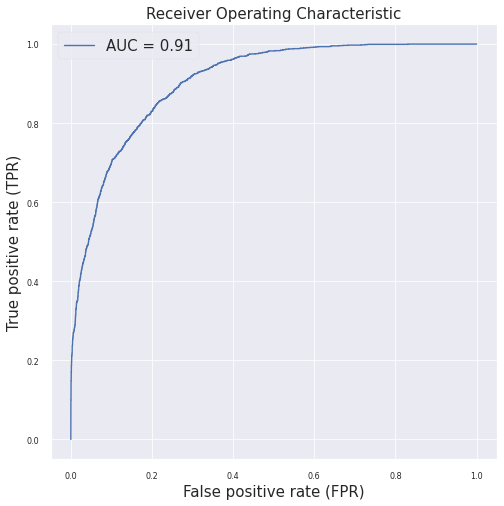

In [68]:
# Вычислить вероятности принадлежности классу 1 для каждого объекта из валидационной выборки
y_pred_proba = sigmoid(X_valid, theta)
calc_and_plot_roc(y_valid, y_pred_proba)

### 4. Добавление регуляризации
### 4.1. Оборачивание линейной регрессии в класс

In [69]:
class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()

        for _ in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, theta_grad)

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)
        
    def predict(self, X):
        raise NotImplementedError()

In [70]:
class LinReg(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [71]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')
def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [72]:
linreg = LinReg(0.01, 500)
X, y = prepare_boston_data()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [73]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_valid)
print_regression_metrics(y_valid, y_pred)

MSE = 22.54, RMSE = 4.75


### 4.2. Оборачивание логистической регрессии в класс

In [74]:
class LogReg(RegOptimizer):
    def sigmoid(self, X, theta):
        return 1. / (1. + np.exp(-X.dot(theta)))
    
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)

        return grad
    
    def predict_proba(self, X):
        return self.sigmoid(X, self.theta)
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = self.predict_proba(X) > 0.5
        
        return y_pred

In [75]:
def prepare_adult_data():
    adult = pd.read_csv('./data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])
    
    # Избавиться от лишних признаков
    adult.drop(['native-country'], axis=1, inplace=True)
    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])
    
    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
    
    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))].values
    y = adult['salary'].values

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [76]:
logreg = LogReg(1., 300)
X, y = prepare_adult_data()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [77]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибку F1-score

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)

print_logisitc_metrics(y_valid, y_pred)

acc = 0.85 F1-score = 0.66


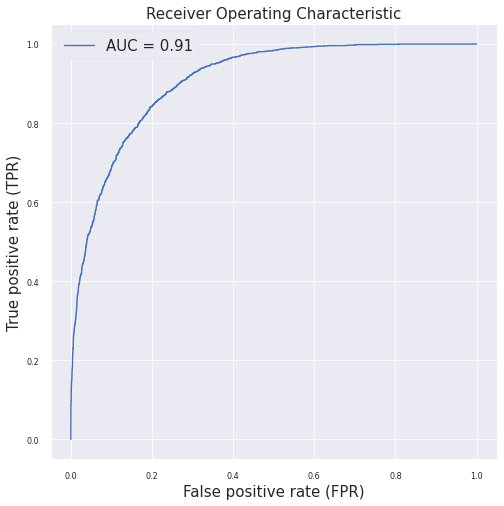

In [78]:
y_pred_proba = logreg.predict_proba(X_valid)
calc_and_plot_roc(y_valid, y_pred_proba)

В случаях линейной и логистической регрессии будем добавлять к функции ошибки регуляризующую часть как:
$$\frac{\lambda}{2m}\sum_{j}^{m}{\theta_j^2},$$
где $\theta$ — вектор параметров линейной модели без фиктивного признака (intercept/bias term), $m$ — количество нефиктивных признаков, $\lambda$ — параметр регуляризации.  


### 4.3. Добавление регуляризатора в линейную регрессию

После добавления регуляризации функция ошибки линейной регрессии будет выглядеть следующим образом:
$$L=\frac{1}{2n} * \sum_{i=1}^{n}{(y_i - \theta^Tx_i)^2} + \frac{\lambda}{2m}\sum_{j}^{m}{\theta_j^2}$$
А ее градиент по параметру $\theta$:
$$\nabla L = \frac{1}{n}\sum_{i=1}^{n}{(\theta^Tx_i - y_i) \cdot x_i} + \frac{\lambda}{m}\sum_{j=1}^{m}{\theta_j} = \frac{1}{n}X^T(X\theta - y) + \frac{\lambda}{m}\sum_{j=1}^{m}{\theta_j}$$

In [79]:
class LinRegRegularized(LinReg):
    def __init__(self, alpha, lambd, n_iters):
        super(LinRegRegularized, self).__init__(alpha, n_iters)
        self._lambd = lambd
    
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)
        grad_term = self._lambd * np.mean(theta)

        return grad + grad_term

In [80]:
linreg = LinRegRegularized(alpha=0.01, lambd=0.05, n_iters=500)
X, y = prepare_boston_data()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [81]:
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_valid)
print_regression_metrics(y_valid, y_pred)

MSE = 26.79, RMSE = 5.18


### 4.4. Добавление регуляризатора в логистическую регрессию

Функция ошибки для логистической регрессии в случае бинарной классификации с регуляризатором записывается следующим образом:
$$L=-\frac{1}{n}(y_i \log h_{\theta}(x_i) + (1-y_i) \log(1-h_{\theta}(x_i)))+\frac{\lambda}{2m}\sum_{j}^{m}{\theta_j^2},$$
где $x_i$ — вектор признаков $i$-го примера из обучающей выборки, $y_i$ — истинный класс для соответствующего примера (0 или 1), $n$ — число примеров в обучающей выборке, $m$ — количество нефиктивных признаков, $\lambda$ — параметр регуляризации, $h_{\theta}(x)$ — sigmoid функция, равная:
$$h_{\theta}(x)=\frac{1}{1+\exp^{-\theta x}},$$
где $\theta$ — вектор параметров логистической регрессии, $x$ - вектор признаков объекта из выборки.  

Соответствующий градиент функции ошибки равен:
$$\nabla L=\frac{1}{n}\sum_{i=1}^{n}{(h_{\theta}(x_i)-y_i)x_i}+\frac{\lambda}{m}\sum_{j}^{m}{\theta_j}$$

In [82]:
class LogRegRegularized(LogReg):
    def __init__(self, alpha, lambd, n_iters):
        super(LogRegRegularized, self).__init__(alpha, n_iters)
        self._lambd = lambd
    
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        grad_term = self._lambd * np.mean(theta)

        return grad + grad_term

In [83]:
logreg = LogRegRegularized(alpha=1., lambd=1., n_iters=300)
X, y = prepare_adult_data()
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


In [84]:
# Разбить выборку на train/valid, оптимизировать theta,
# сделать предсказания и посчитать ошибку F1-score

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_valid)

print_logisitc_metrics(y_valid, y_pred)

acc = 0.85 F1-score = 0.65


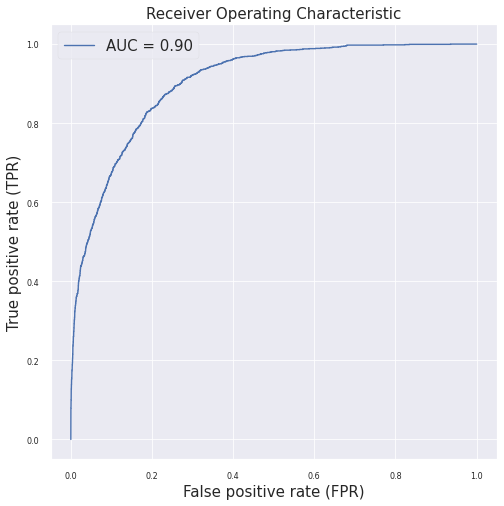

In [85]:
y_pred_proba = logreg.predict_proba(X_valid)
calc_and_plot_roc(y_valid, y_pred_proba)

### Задание 3B.6.1
Постройте модель логистической регрессии при помощи sklearn. Используйте параметры по умолчанию, обучите на всей выборке и посчитайте F1 score.  
*Ответ округлите до сотых.*

In [88]:
X, y = prepare_adult_data()

model = LogisticRegression()
model.fit(X, y)

Y_predicted = model.predict(X)
f1_score_f = f1_score(y,Y_predicted)

print(f"f1_score:= {round(f1_score_f,2)}")

f1_score:= 0.66


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 3B.6.2
Посчитайте confusion matrix для классификатора из задачи 3.6.1. Введите значения получившейся матрицы в соответствующие ячейки

In [ ]:
from sklearn.metrics import confusion_matrix

class_names  = np.array(['more','less'], dtype = 'U10')

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.style.use('seaborn-paper')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.grid(False)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Целевая переменная',
           xlabel='Предсказанные значени')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(y, Y_predicted, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y, Y_predicted, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### Задание 3B.6.3
Постройте ROC-кривую и посчитайте ROC - AUC для классификатора из задачи 3.6.1.
Ответ округлите до сотых.

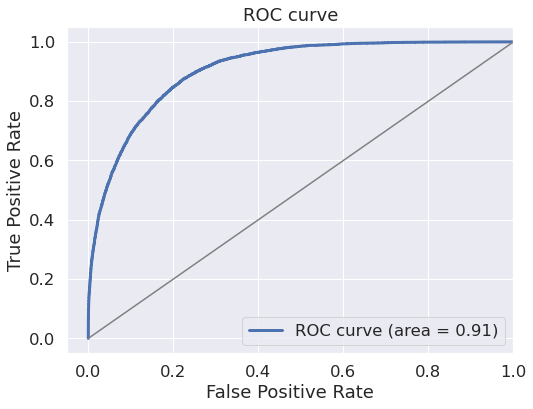

In [90]:
y_pred_proba_pack = model.predict_proba(X)
roc_auc_score_f = roc_auc_score(y, y_pred_proba_pack[:, 1])

plt.style.use('seaborn-paper')
sns.set(font_scale=1.5)
# sns.set_color_codes("muted")

plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, y_pred_proba_pack[:,1], pos_label=1)

plt.plot(fpr, tpr, lw=3, label='ROC curve (area = %0.2f)' % roc_auc_score_f)
plt.plot([0, 1], [0, 1], color='grey')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### Задание 3B.6.4
Постройте модель логистической регрессии при помощи sklearn без регуляризации.  
Чему равен f1_score?  
*Ответ округлите до сотых.*

In [92]:
X, y = prepare_adult_data()

model = LogisticRegression(penalty='none')
model.fit(X, y)

Y_predicted = model.predict(X)
f1_score_f = f1_score(y,Y_predicted)

temp = f1_score_f

print(f"f1_score = {round(f1_score_f,2)}")

f1_score = 0.66


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 3B.6.5
Переберите коэффициенты $l2$-регуляризации от 0.01 до 1 с шагом 0.01 и определите, на каком из них модель логистической регрессии из sklearn даёт наибольший f1_score.  
*Ответ округлите до сотых.*

In [94]:
list_param_for_max_f1_score = []
max_f1_score = 0
for i in np.arange(0.01, 1.01, 0.01):
    logistic_L2 = LogisticRegression()
    model = LogisticRegression(penalty='l2', C=(1/i), max_iter=1000)
    model.fit(X, y)
    Y_predicted = model.predict(X)
    f1_score_f = f1_score(y,Y_predicted)
    if f1_score_f>max_f1_score:
        max_f1_score = f1_score_f
        list_param_for_max_f1_score = [i, max_f1_score]

temp = list_param_for_max_f1_score[0]
temp2 = list_param_for_max_f1_score[1]

print(f"При коэффициенте i ={round(temp,2)}, С = 1/i  = {round(1/temp,2)}, f1_score максимален и равен = {round(temp2,2)}")

При коэффициенте i =0.76, С = 1/i  = 1.32, f1_score максимален и равен = 0.66


### Задание 3B.6.6
Замените в столбце native-country страны, у которых меньше ста записей, на other, поменяйте этот столбец на dummy-переменные, обучите классификатор на всей выборке и посчитайте f1_score.  
*Ответ округлите до сотых*

In [95]:
def prepare_adult_data_new():
    adult = pd.read_csv('./data/adult.data',
                        names=['age', 'workclass', 'fnlwgt', 'education',
                               'education-num', 'marital-status', 'occupation',
                               'relationship', 'race', 'sex', 'capital-gain',
                               'capital-loss', 'hours-per-week', 'native-country', 'salary'])
    
    # # Избавиться от лишних признаков
    # adult.drop(['native-country'], axis=1, inplace=True)

    # в столбце native-country страны, у которых меньше ста записей, на other, поменяйте этот столбец
    under_100 = adult['native-country'].value_counts()[adult['native-country'].value_counts() < 100].index.to_list()
    adult['native-country'] = adult['native-country'].apply(lambda x: 'other' if x in under_100 else x)

    # Сконвертировать целевой столбец в бинарные значения
    adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
    # Сделать one-hot encoding для некоторых признаков
    adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
    
    # Нормализовать нуждающиеся в этом признаки
    a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
    norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
    adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features
    
    # Разбить таблицу данных на матрицы X и y
    X = adult[list(set(adult.columns) - set(['salary']))].values
    y = adult['salary'].values

    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

In [96]:
X, y = prepare_adult_data_new()

model = LogisticRegression(penalty='none')
model.fit(X, y)

Y_predicted = model.predict(X)
f1_score_f = f1_score(y,Y_predicted)

print(f"f1_score = {round(f1_score_f,2)}")

f1_score = 0.66


/home/dell/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
